# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data and visualiztion

In [5]:
n1=5
n2=5
# cluster #每個cluster 生成五個點
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1)))
# cluster 
x2 = np.random.normal(30,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[61.50684248  5.38041645]
[33.07176103  5.1200354 ]


In [6]:
X_train 

array([[56.1818466 ,  5.38548072],
       [56.95827875,  5.23095575],
       [67.0817125 ,  4.79742385],
       [72.49886165,  5.9934783 ],
       [54.81351291,  5.49474362],
       [40.53333743,  4.74774003],
       [21.43910845,  5.39370908],
       [35.2654712 ,  5.47627302],
       [42.20469167,  4.48275859],
       [25.91619638,  5.49969629]])

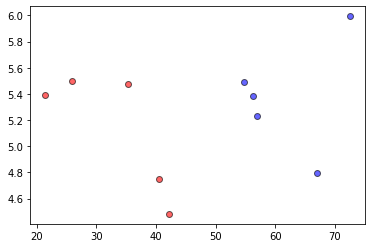

In [7]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [8]:
X_train

array([[56.1818466 ,  5.38548072],
       [56.95827875,  5.23095575],
       [67.0817125 ,  4.79742385],
       [72.49886165,  5.9934783 ],
       [54.81351291,  5.49474362],
       [40.53333743,  4.74774003],
       [21.43910845,  5.39370908],
       [35.2654712 ,  5.47627302],
       [42.20469167,  4.48275859],
       [25.91619638,  5.49969629]])

In [9]:
X_train.shape

(10, 2)

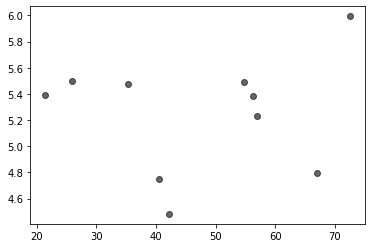

In [10]:
plot_scatter(X_train)
plt.show()

In [11]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [47.28930175  5.25022592]
std: [16.11692464  0.42559679]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [14]:
kmeans = KMeans(init='random',n_clusters=2).fit(X_train)
kmeans

KMeans(init='random', n_clusters=2)

In [15]:
kmeans.predict([[80, 0], [100, 3]])

array([0, 0], dtype=int32)

In [16]:
kmeans.predict([[28, 5]])

array([1], dtype=int32)

In [17]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[61.50684248,  5.38041645],
       [33.07176103,  5.1200354 ]])

In [19]:
X_train

array([[56.1818466 ,  5.38548072],
       [56.95827875,  5.23095575],
       [67.0817125 ,  4.79742385],
       [72.49886165,  5.9934783 ],
       [54.81351291,  5.49474362],
       [40.53333743,  4.74774003],
       [21.43910845,  5.39370908],
       [35.2654712 ,  5.47627302],
       [42.20469167,  4.48275859],
       [25.91619638,  5.49969629]])

In [20]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [21]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

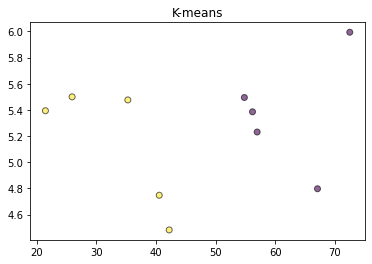

In [22]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [23]:
kmeans.cluster_centers_

array([[61.50684248,  5.38041645],
       [33.07176103,  5.1200354 ]])

In [24]:
kmeans.cluster_centers_[:,1]

array([5.38041645, 5.1200354 ])

In [25]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

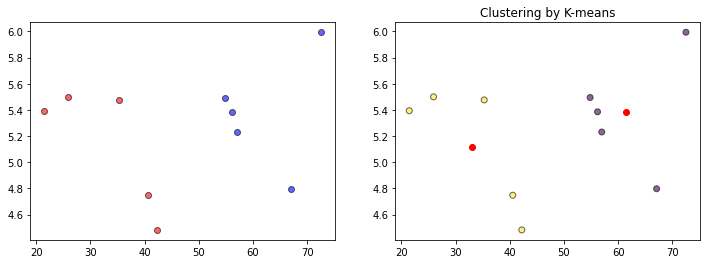

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')
plt.title("Clustering by K-means")
plt.show()


## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [27]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [28]:
acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [29]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

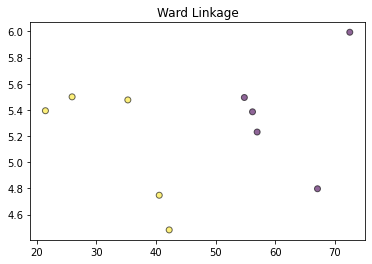

In [30]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linkage")
plt.show()

In [31]:
X_train

array([[56.1818466 ,  5.38548072],
       [56.95827875,  5.23095575],
       [67.0817125 ,  4.79742385],
       [72.49886165,  5.9934783 ],
       [54.81351291,  5.49474362],
       [40.53333743,  4.74774003],
       [21.43910845,  5.39370908],
       [35.2654712 ,  5.47627302],
       [42.20469167,  4.48275859],
       [25.91619638,  5.49969629]])

## distance matrix

In [32]:
from sklearn.metrics import pairwise_distances 
from sklearn.datasets import make_circles,make_blobs
D = np.round(pairwise_distances(X_train),1) 
D

array([[ 0. ,  0.8, 10.9, 16.3,  1.4, 15.7, 34.7, 20.9, 14. , 30.3],
       [ 0.8,  0. , 10.1, 15.6,  2.2, 16.4, 35.5, 21.7, 14.8, 31. ],
       [10.9, 10.1,  0. ,  5.5, 12.3, 26.5, 45.6, 31.8, 24.9, 41.2],
       [16.3, 15.6,  5.5,  0. , 17.7, 32. , 51.1, 37.2, 30.3, 46.6],
       [ 1.4,  2.2, 12.3, 17.7,  0. , 14.3, 33.4, 19.5, 12.6, 28.9],
       [15.7, 16.4, 26.5, 32. , 14.3,  0. , 19.1,  5.3,  1.7, 14.6],
       [34.7, 35.5, 45.6, 51.1, 33.4, 19.1,  0. , 13.8, 20.8,  4.5],
       [20.9, 21.7, 31.8, 37.2, 19.5,  5.3, 13.8,  0. ,  7. ,  9.3],
       [14. , 14.8, 24.9, 30.3, 12.6,  1.7, 20.8,  7. ,  0. , 16.3],
       [30.3, 31. , 41.2, 46.6, 28.9, 14.6,  4.5,  9.3, 16.3,  0. ]])

In [33]:
D.shape[0]

10

In [34]:
def min_dist(D):
    minimum=10000  
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j]<minimum:         
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])
                
    return (min_x,min_y),minimum

In [35]:
min_dist(D)

((1, 0), 0.8)

## plot dendrogram (樹狀圖)

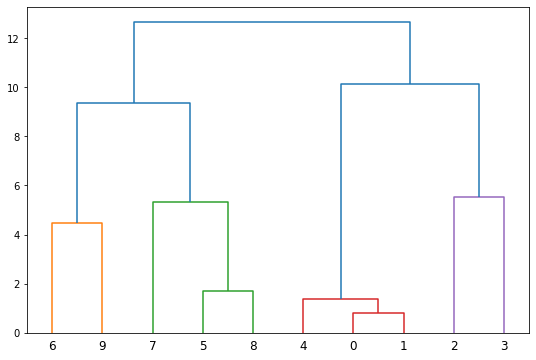

In [36]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

## Comparing different hierarchical linkage methods

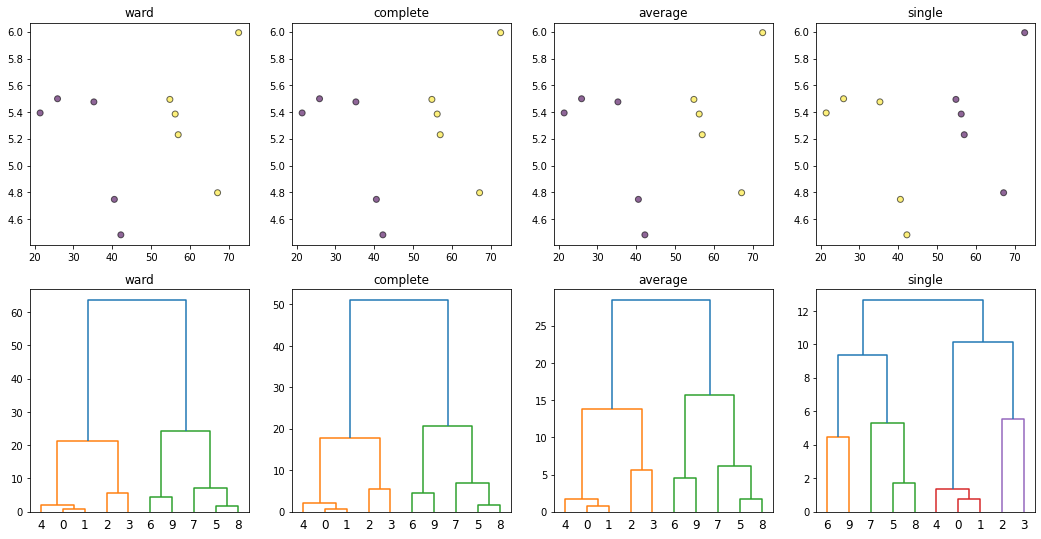

In [37]:

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)   
        #plot scatter 
        plt.subplot(2,4,i+1)        
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)        
        plot_dendrogram(X,link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [39]:
X_train

array([[56.1818466 ,  5.38548072],
       [56.95827875,  5.23095575],
       [67.0817125 ,  4.79742385],
       [72.49886165,  5.9934783 ],
       [54.81351291,  5.49474362],
       [40.53333743,  4.74774003],
       [21.43910845,  5.39370908],
       [35.2654712 ,  5.47627302],
       [42.20469167,  4.48275859],
       [25.91619638,  5.49969629]])

[47.28930175  5.25022592]
[16.11692464  0.42559679]


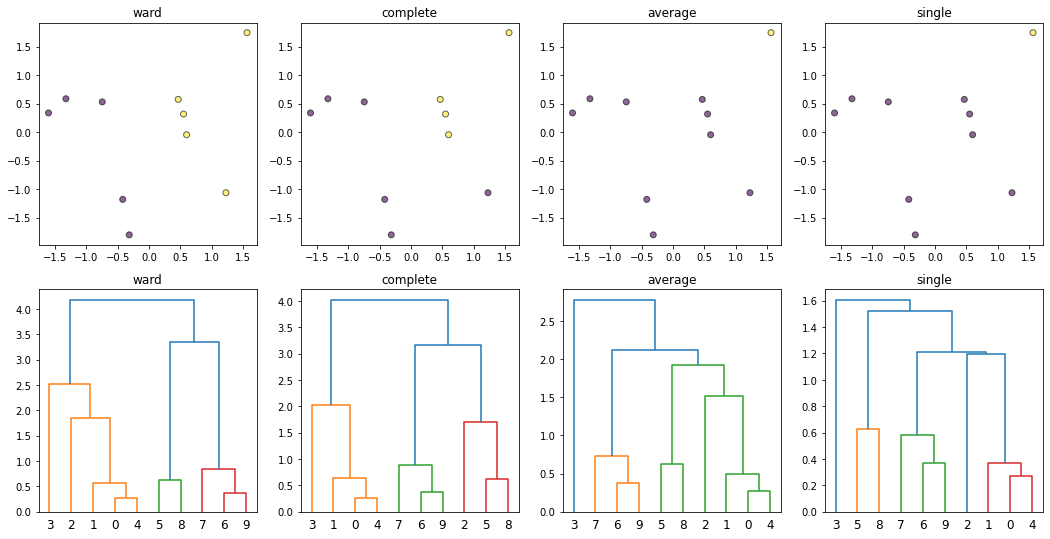

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [41]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [42]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


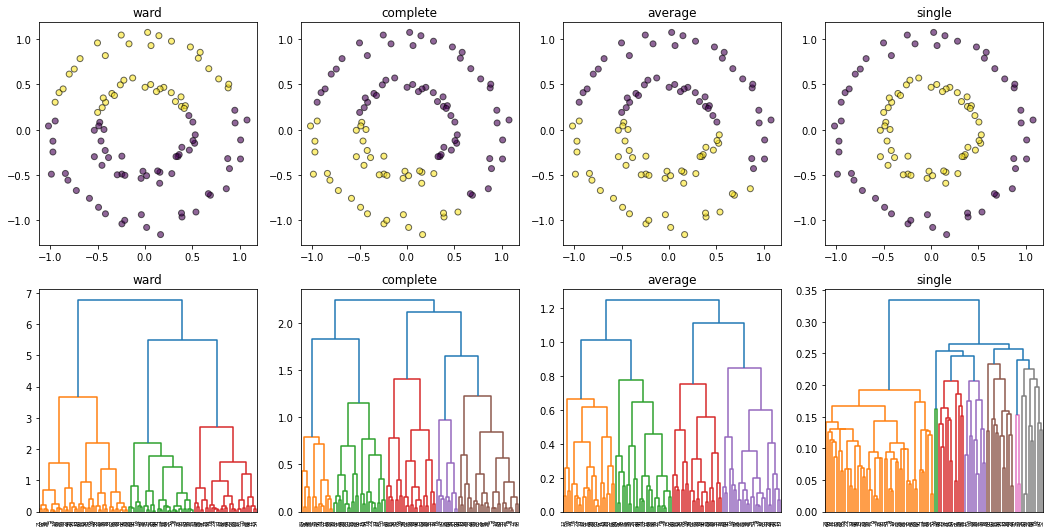

In [43]:
compare_linkage(X)